<a href="https://colab.research.google.com/github/Vridhip/Online_Retail_Customer_Segmentation/blob/main/Online_Retail_Customer_Segmentation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

##Exponential Data Analyst

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 

%matplotlib inline

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
data_path = ('/content/drive/MyDrive/Customer Segmentation/Data & Resources/Online Retail.xlsx')
data = pd.read_excel(data_path)

In [51]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [53]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [55]:
data.shape

(541909, 8)

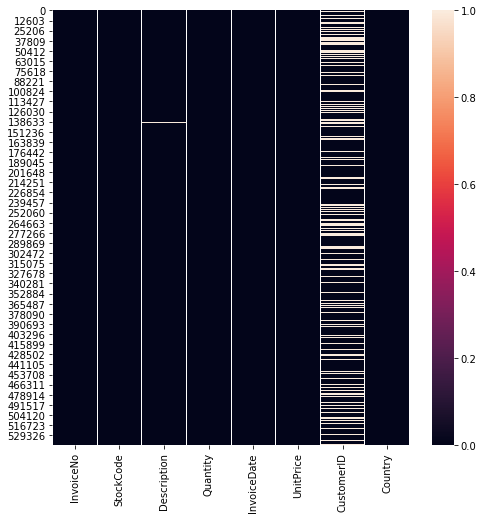

In [57]:
#printing the graph containing a NaN values
null_values=data.isnull()
plt.figure(figsize=(8,8))
sns.heatmap(null_values)

In [58]:
data[data['CustomerID'].isna()==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [60]:
data.shape

(541909, 8)

In [61]:
#here we observe a lot of nan values in customer Id so its not feasible to replace those values and hence we will drop those rows
data.dropna(subset=['CustomerID'], inplace = True)

In [62]:
data.shape

(406829, 8)

In [63]:
data[data['Description'].isna()==True]
#the missing value in the description is also cleared while dropping the values from the CoustomerId

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


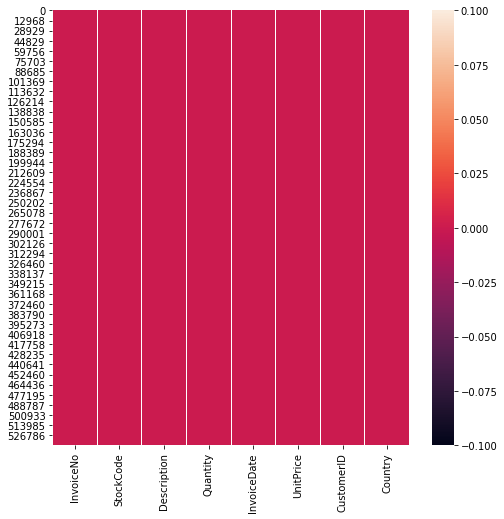

In [64]:
#The heatmap after clearing all the Nan values
nan_values = data.isnull()
plt.figure(figsize=(8,8))
sns.heatmap(nan_values)

In [65]:
data['Month'] = data['InvoiceDate'].apply(lambda x:x.strftime("%Y-%m-%d (%H:%M:%S)")[0:7])

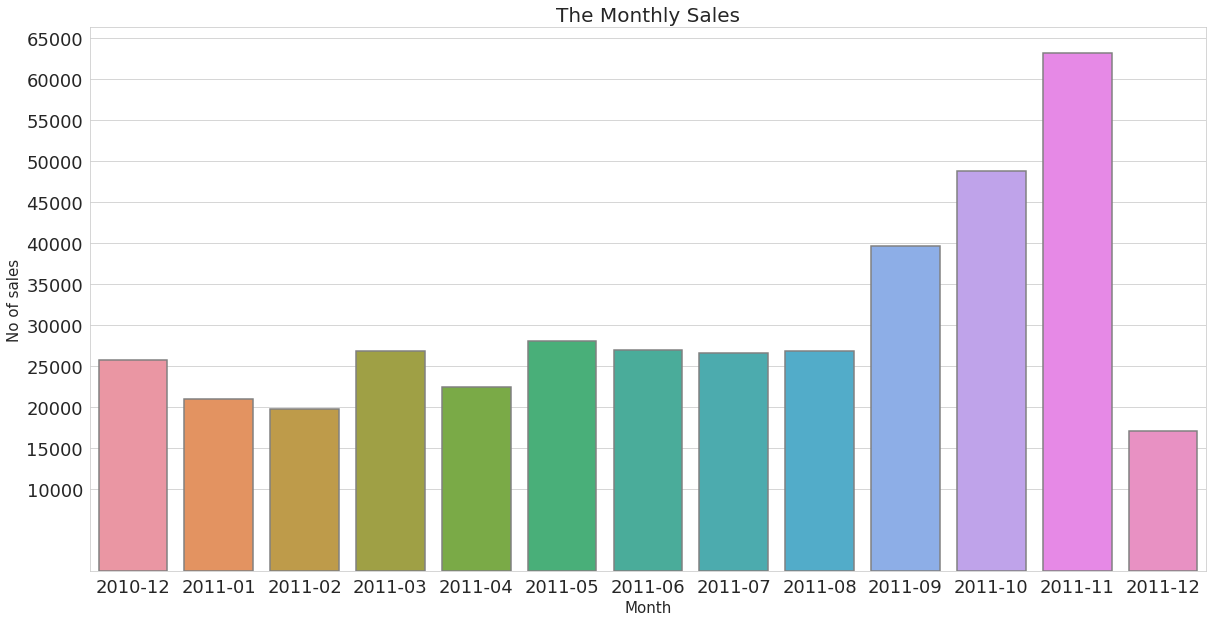

In [104]:
#plot to see which months did really good in sales from an entire year
monthly_sales=data.groupby('Month').count().reset_index()
fig,axes = plt.subplots(figsize=(20,10))
sns.axes_style('darkgrid')
sns.barplot(data=monthly_sales,x='Month',y='InvoiceNo',ax=axes,linewidth=1.5,edgecolor='0.5')
axes.set_yticks(range(10000,70000,5000))
axes.set_ylabel("No of sales",size=15)
axes.set_xlabel("Month",size=15)
axes.set_title("The Monthly Sales",size=20)
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(18)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)

In [70]:
data['Quantity'].value_counts()

 1      73314
 12     60033
 2      58003
 6      37688
 4      32183
        ...  
-51         1
 95         1
-162        1
 94         1
 342        1
Name: Quantity, Length: 436, dtype: int64

In [71]:
#here we observe that we have negative values of quantity for cancelled orders and hence we will have to drop those rows
data = data[data['Quantity']>0]
data.shape

(397924, 9)

In [72]:
data.drop_duplicates(inplace=True)
data.shape

(392732, 9)

In [74]:
data['TotalAmountonprod'] = data.apply(lambda x: x['Quantity'] * x['UnitPrice'] ,axis=1)

In [98]:
data.groupby('Country')['InvoiceNo'].count().sort_values(ascending=False)

Country
United Kingdom          349227
Germany                   9027
France                    8327
EIRE                      7228
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1453
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45


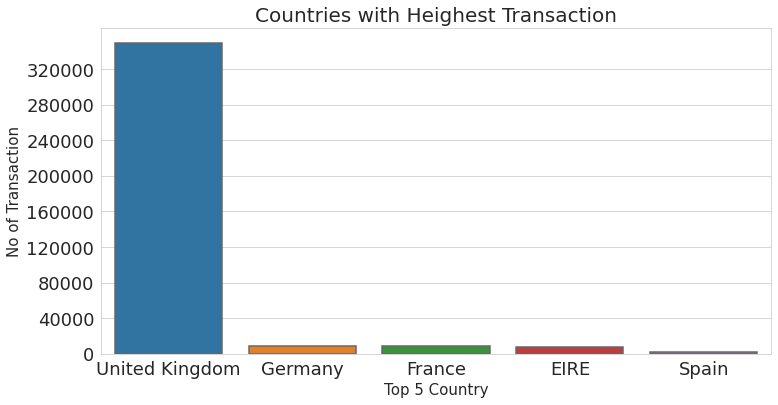

In [97]:
country_plot=data.groupby('Country')['InvoiceNo'].count().reset_index()
country_plot.sort_values('InvoiceNo',ignore_index=True, ascending=False, inplace=True)
fig,axes = plt.subplots(figsize=(12,6))
sns.set_style("whitegrid")
sns.barplot(data=country_plot[:5],x="Country",y="InvoiceNo",ax=axes,linewidth=1.5,edgecolor='0.4')
axes.set_yticks(range(0,360000,40000))
axes.set_xlabel("Top 5 Country",size=15)
axes.set_ylabel("No of Transaction",size=15)
axes.set_title("Countries with Heighest Transaction",size=20)
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(18)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)


In [116]:
data.groupby('CustomerID')['TotalAmountonprod'].sum().reset_index().sort_values

<bound method DataFrame.sort_values of       CustomerID  TotalAmountonprod
0        12346.0           77183.60
1        12347.0            4310.00
2        12348.0            1797.24
3        12349.0            1757.55
4        12350.0             334.40
...          ...                ...
4334     18280.0             180.60
4335     18281.0              80.82
4336     18282.0             178.05
4337     18283.0            2045.53
4338     18287.0            1837.28

[4339 rows x 2 columns]>

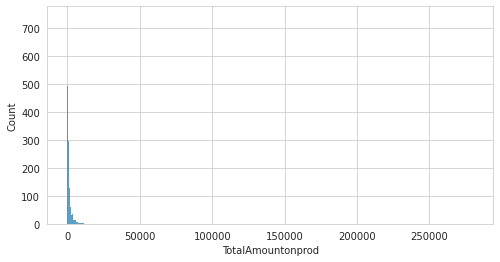

In [130]:
# lets see the most amount of money paid on a perticular Invoice
Total_sales= data.groupby('CustomerID').sum().reset_index()
plt.figure(figsize=(8,4))
sns.histplot(Total_sales['TotalAmountonprod'])